# Step 0 Load Dataset
- In this step, you use pandas to load `train_data_ads.csv` as a panda dataframe.
- Source: https://colab.research.google.com/drive/1hzpIXsnND-pn6QnGnqJXwllFlHiO8A-d#scrollTo=JVpsdm1lrX-H 

In [3]:
import pandas as pd 
df = pd.read_csv('../../train_data_ads.csv')
print("data is loaded...") # 31.8 s

data is loaded...


# Step 1 Explore The Dataset

- Exercise 1.1: Print the dimension of the dataframe
- Exercise 1.2: Print the column name of the dataframe
- Exercise 1.3: Sort the columns based on their number of unique values

In [2]:
# Solution 1.1 
print(df.shape)
# Solution 1.2 
print(df.columns)
# Solution 1.3
print(df.nunique().sort_values())

(7675517, 35)
Index(['log_id', 'label', 'user_id', 'age', 'gender', 'residence', 'city',
       'city_rank', 'series_dev', 'series_group', 'emui_dev', 'device_name',
       'device_size', 'net_type', 'task_id', 'adv_id', 'creat_type_cd',
       'adv_prim_id', 'inter_type_cd', 'slot_id', 'site_id', 'spread_app_id',
       'hispace_app_tags', 'app_second_class', 'app_score',
       'ad_click_list_v001', 'ad_click_list_v002', 'ad_click_list_v003',
       'ad_close_list_v001', 'ad_close_list_v002', 'ad_close_list_v003',
       'pt_d', 'u_newsCatInterestsST', 'u_refreshTimes', 'u_feedLifeCycle'],
      dtype='object')
site_id                       1
label                         2
app_score                     3
gender                        3
inter_type_cd                 4
city_rank                     4
net_type                      6
series_group                  7
u_feedLifeCycle               8
age                           8
creat_type_cd                 9
u_refreshTimes             

# Step 2 How many Advertisement Task? How many samples for each Task?

- Exercise 2.1 : Make a variable `task_counts` that stores the number of samples for each `task_id`. 
- Exercise 2.2 : Calculate the mean and standard deviation of `task_counts`
- Exercise 2.3 : Calculate the quantiles (Q1, Q2, Q3) and the maxmum and minimum values of `task_counts`
- Exercise 2.4 : Print the result of Exercise 2.1, 2.2, 2.3

In [4]:
# Solution 2.1
task_counts = df['task_id'].value_counts()

# Solution 2.2

## Calculate mean
mean_value = task_counts.mean()

## Calculate standard deviation
std_deviation = task_counts.std()

# Solution 2.3

## Calculate quartiles (Q1, Q2, Q3)
q1 = task_counts.quantile(0.25)
q2 = task_counts.median()
q3 = task_counts.quantile(0.75)

## Calculate maximum and minimum values
max_value = task_counts.max()
min_value = task_counts.min()

# Solution 2.4 
## Print results
print(f'Mean: {mean_value}')
print(f'Standard Deviation: {std_deviation}')
print(f'Q1 (25th percentile): {q1}')
print(f'Q2 (Median, 50th percentile): {q2}')
print(f'Q3 (75th percentile): {q3}')
print(f'Maximum Value: {max_value}')
print(f'Minimum Value: {min_value}')

Mean: 684.7637612632706
Standard Deviation: 3733.6798077622416
Q1 (25th percentile): 8.0
Q2 (Median, 50th percentile): 50.0
Q3 (75th percentile): 272.0
Maximum Value: 154812
Minimum Value: 1


# Step 3 Visualize the Distribution of Sample sizer for each Advertisement Task

- Exercise 3.1: Make a variable `task_counts` that stores the number of samples for each `task_id`.
- Exercise 3.2: Define a `bins` variable to make group by sample size: (0-500), (500-2000), (2000-10000), (Over 10000). For example, a task belongs to group (500-2000) means for the task it has sample size between 500-2000. 
- Exercise 3.3: Group the task by the `bins` you defined at Exercise 3.2. 
- Exercise 3.4: Count the number of task in each sample size group
- Exercise 3.5: Make group label for the 4 sample size group
- Exercise 3.6: Make Bar Plot to visualize the distribution of sample size for each Advertisement Task 

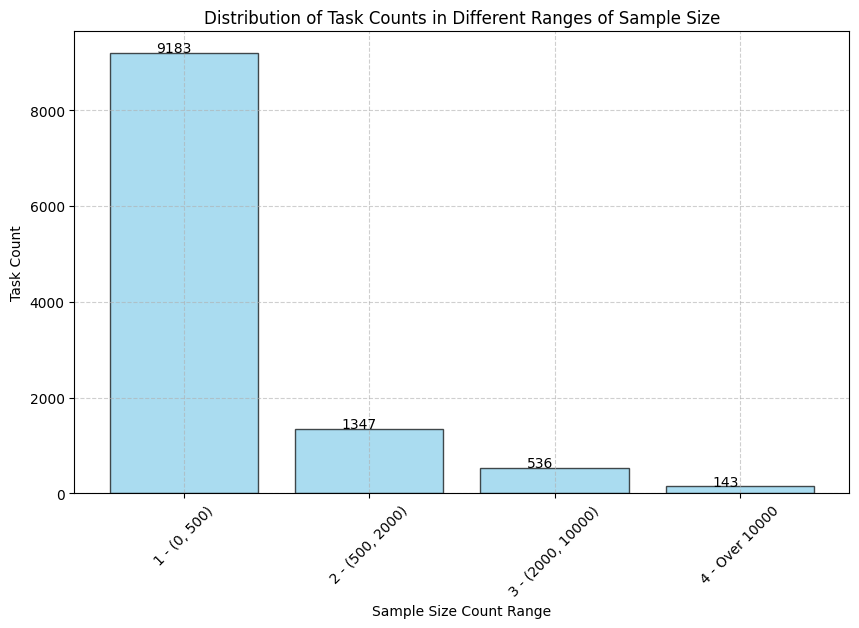

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Solution 3.1 

## Assuming your DataFrame is named df
task_counts = df['task_id'].value_counts()

# Solution 3.2

## Define bin edges
bins = [0, 500, 2000, 10000, float('inf')]

# Solution 3.3

## Bucket task_counts using pd.cut
task_groups = pd.cut(task_counts, bins=bins)

# Solution 3.4

## Count the number of occurrences for each group
task_counts_by_group = task_groups.value_counts().sort_index()

# Solution 3.5

## Extract labels for the groups
group_labels = ['1 - (0, 500)', '2 - (500, 2000)', '3 - (2000, 10000)', '4 - Over 10000']

# Solution 3.6

## Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(group_labels, task_counts_by_group, color='skyblue', edgecolor='k', alpha=0.7)
plt.xlabel('Sample Size Count Range')
plt.ylabel('Task Count')
plt.title('Distribution of Task Counts in Different Ranges of Sample Size')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)

## Add text labels above each bar
for bar, count in zip(bars, task_counts_by_group):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 20, str(count), fontsize=10)

plt.show()


Now, you find
- 9183 Advertisement Task with sample size 0-500
- 1347 Advertisement Task with sample size 500-2000
- 536 Advertisement Task with sample size 2000-10000
- 143 Advertisement Task with sample size over 10000
We are going to focus on Advertisement Task with sample size over 10000

# Step 4 Visualize the Distribution of Label Rate for each Advertisement Task
- group the data by the column 'task_id'
- then calculate_label_rate on the grouped data 
- plot the distribution of the label rate

In [4]:
def calculate_label_rate(df):
        # Get the total number of samples
        total_samples = len(df)

        # Count the occurrences of each label in the 'label' column of df dataframe.
        label_counts = df['label'].value_counts()
        # Extract the count of positive labels (label == 1) from the label_counts series.
        positive_count = label_counts.get(1, 0)
        # Extract the count of negative labels (label == 0) from the label_counts series.
        negative_count = label_counts.get(0, 0)
        # Calculate the rate of positive labels to negative labels.
        # label_rate = positive_count / negative_count if negative_count != 0 else 0
        label_rate = positive_count / total_samples

        return label_rate

/var/folders/_r/6_qzzw511b16y7chkmqr51_80000gn/T/ipykernel_7186/1621178782.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = df.groupby('task_id').apply(calculate_label_rate).reset_index(name='label_rate')


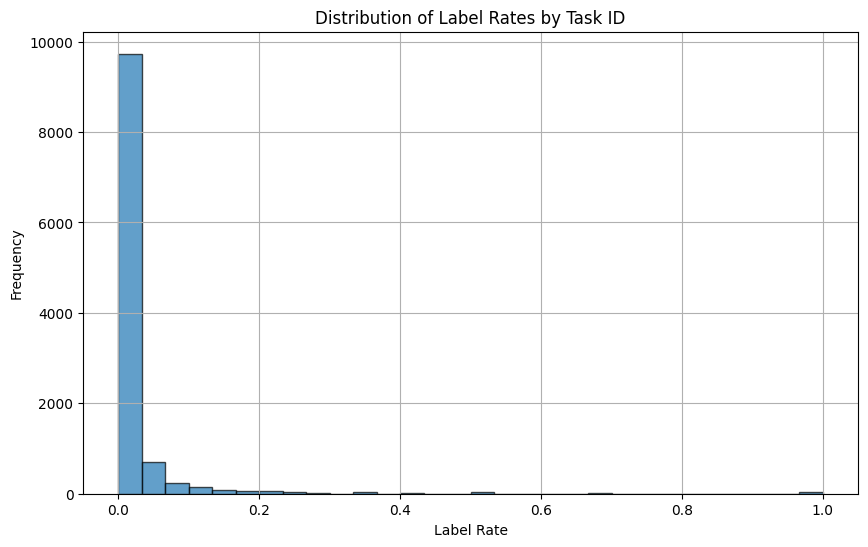

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the dataframe by 'task_id' and calculate the label rate for each group
grouped = df.groupby('task_id').apply(calculate_label_rate).reset_index(name='label_rate')

# Plot the distribution of the label rates
plt.figure(figsize=(10, 6))
plt.hist(grouped['label_rate'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Label Rates by Task ID')
plt.xlabel('Label Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [7]:
grouped['label_rate'].describe()

count    11209.000000
mean         0.023297
std          0.077666
min          0.000000
25%          0.000000
50%          0.004132
75%          0.018421
max          1.000000
Name: label_rate, dtype: float64